# Best Times to Tweets in Healthcare vs. Education

### Read in the csv file

In [1]:
import pandas as pd
df = pd.read_csv(r"E:\OneDrive - University of Georgia\Project\Data\tweet_data_3_groccery\4.3 FourColumns 3+1csv - Copy\grocerry_2020.csv",low_memory=False)
#df

### Convert the "Created At" field into a datetime data type, extract the day of the week, and map it onto a new column called "weekdays"

In [2]:
import datetime

df1 = df.copy()

df1['local_time'] = pd.to_datetime(df1['local_time'])
value = df1['local_time']
        
def weekday(date):
    if date.weekday() == 0:
        return 'Monday'
    elif date.weekday() == 1:
        return 'Tuesday'
    elif date.weekday() == 2:
        return 'Wednesday'
    elif date.weekday() == 3:
        return 'Thursday'
    elif date.weekday() == 4:
        return 'Friday'
    elif date.weekday() == 5:
        return 'Saturday'
    else:
        return 'Sunday'

df1["weekdays"] = value.map(weekday)
df1['weekdays']

0         Monday
1         Monday
2         Monday
3         Monday
4         Monday
           ...  
222972    Monday
222973    Monday
222974    Monday
222975    Monday
222976    Monday
Name: weekdays, Length: 222977, dtype: object

### Extract the time and map it onto a new column called "time"

In [3]:
df2 = df1.copy()

def time(date):
    time2 = date.time()
    return time2

df2["time"] = value.map(time)
df2['time']

0         18:59:29
1         18:56:59
2         18:56:14
3         15:52:33
4         17:50:28
            ...   
222972    18:13:39
222973    18:12:12
222974    19:09:25
222975    19:08:17
222976    18:01:36
Name: time, Length: 222977, dtype: object

### Group the times into hourly buckets and map it onto a new column called "time groups"

In [4]:
df3 = df2.copy()

def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '12AM-1AM'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '1AM-2AM'
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '2AM-3AM'
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '3AM-4AM'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '4AM-5AM'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '5AM-6AM'
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '6AM-7AM'
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '7AM-8AM'
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '8AM-9AM'
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '9AM-10AM'
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10AM-11AM'
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11AM-12PM'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12PM-1PM'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '1PM-2PM'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '2PM-3PM'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '3PM-4PM'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '4PM-5PM'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '5PM-6PM'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '6PM-7PM'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '7PM-8PM'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '8PM-9PM'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '9PM-10PM'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '10PM-11PM'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '11PM-12AM'
    else:
        return 'other'

df3["time groups"] = df3['time'].map(time_groups)
df3

,text,lon,lat,local_time,weekdays,time,time groups
0,@andylassner Walmart specials,-75.386461,39.145023,2020-01-20 18:59:29,Monday,18:59:29,6PM-7PM
1,Walmart just gave me the biggest fucking attit...,-81.986834,26.636480,2020-01-20 18:56:59,Monday,18:56:59,6PM-7PM
2,The Chicken Tenders sub from Publix is the bes...,-81.367773,28.501678,2020-01-20 18:56:14,Monday,18:56:14,6PM-7PM
3,Finna go to Costco y’all want sum ? https://t....,-122.410744,37.770520,2020-01-20 15:52:33,Monday,15:52:33,3PM-4PM
4,they really only got 3 lanes open at Walmart h...,-89.390275,31.316364,2020-01-20 17:50:28,Monday,17:50:28,5PM-6PM
...,...,...,...,...,...,...,...
222972,When it’s a thousand people in Walmart &amp; y...,-87.322169,36.550984,2020-01-20 18:13:39,Monday,18:13:39,6PM-7PM
222973,@Walmart tried reaching out online. Wasnt wor...,-88.342973,42.192257,2020-01-20 18:12:12,Monday,18:12:12,6PM-7PM
222974,Everyone needs tactical gear and an assault ri...,-79.833837,40.477273,2020-01-20 19:09:25,Monday,19:09:25,7PM-8PM
222975,@honeydipdenz LMFAO omg target too !! It’s cra...,-71.508912,41.696718,2020-01-20 19:08:17,Monday,19:08:17,7PM-8PM


### Get the value counts of "weekdays"

In [5]:
df3['weekdays'].value_counts()

Thursday     35158
Wednesday    32924
Friday       32361
Saturday     32008
Tuesday      31284
Sunday       29806
Monday       29436
Name: weekdays, dtype: int64

### Get the value counts of "time groups"

In [6]:
df3['time groups'].value_counts()

12PM-1PM     15301
6PM-7PM      14933
5PM-6PM      14686
1PM-2PM      14665
2PM-3PM      14620
3PM-4PM      14583
4PM-5PM      14157
11AM-12PM    14050
7PM-8PM      14041
8PM-9PM      12747
10AM-11AM    12698
9PM-10PM     11417
9AM-10AM     10805
10PM-11PM     8661
8AM-9AM       8462
11PM-12AM     6082
7AM-8AM       5544
12AM-1AM      4110
6AM-7AM       3150
1AM-2AM       2446
2AM-3AM       1688
5AM-6AM       1616
3AM-4AM       1258
4AM-5AM       1171
other           86
Name: time groups, dtype: int64

### Renamed "time groups" to "time_groups" for manipulation purposes later

In [7]:
df4 = df3.copy()
df5 = df4.rename(index=str, columns={"time groups": "time_groups"})
df5

,text,lon,lat,local_time,weekdays,time,time_groups
0,@andylassner Walmart specials,-75.386461,39.145023,2020-01-20 18:59:29,Monday,18:59:29,6PM-7PM
1,Walmart just gave me the biggest fucking attit...,-81.986834,26.636480,2020-01-20 18:56:59,Monday,18:56:59,6PM-7PM
2,The Chicken Tenders sub from Publix is the bes...,-81.367773,28.501678,2020-01-20 18:56:14,Monday,18:56:14,6PM-7PM
3,Finna go to Costco y’all want sum ? https://t....,-122.410744,37.770520,2020-01-20 15:52:33,Monday,15:52:33,3PM-4PM
4,they really only got 3 lanes open at Walmart h...,-89.390275,31.316364,2020-01-20 17:50:28,Monday,17:50:28,5PM-6PM
...,...,...,...,...,...,...,...
222972,When it’s a thousand people in Walmart &amp; y...,-87.322169,36.550984,2020-01-20 18:13:39,Monday,18:13:39,6PM-7PM
222973,@Walmart tried reaching out online. Wasnt wor...,-88.342973,42.192257,2020-01-20 18:12:12,Monday,18:12:12,6PM-7PM
222974,Everyone needs tactical gear and an assault ri...,-79.833837,40.477273,2020-01-20 19:09:25,Monday,19:09:25,7PM-8PM
222975,@honeydipdenz LMFAO omg target too !! It’s cra...,-71.508912,41.696718,2020-01-20 19:08:17,Monday,19:08:17,7PM-8PM


### Define the efficiency scores for the heat map

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                "Friday", "Saturday", "Sunday"]
time_frames = ["12AM-1AM", "1AM-2AM", "2AM-3AM", "3AM-4AM", "4AM-5AM", 
               "5AM-6AM", "6AM-7AM", "7AM-8AM", "8AM-9AM", "9AM-10AM",
               "10AM-11AM", "11AM-12PM", "12PM-1PM", "1PM-2PM", "2PM-3PM",
               "3PM-4PM", "4PM-5PM", "5PM-6PM", "6PM-7PM", "7PM-8PM",
               "8PM-9PM", "9PM-10PM", "10PM-11PM", "11PM-12AM"]


def hc_efficiency_score(df, day, times):
    array1 = []
    array2=[]
    instance_val = 0
    #for each of the time frames
    for time in times:
        #locate the day of the week and the specific time frame, pull the data
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays", "time_groups"]]
        #If there are no tweets in that time frame
        if m1["time_groups"].count() == 0:
            #instance_val = 0
            #lowest category
            sum1 = 0
        else:
            #Sum the retweets, replies, and favorites and divide by num of tweets
            instance_val =  m1["time_groups"].count()
            array2.append(instance_val)
            #589.625 1392.5 2596.375 3876.5 4856.625 5232.25 5449.25 6275
            #putting the tweets into categorical buckets
            if  instance_val >=  quartile_15 and instance_val <quartile_16+1:
                sum1 = 16
            elif instance_val >= quartile_14 and instance_val < quartile_15:
                sum1 = 15
            elif  instance_val >=  quartile_13 and instance_val <quartile_14:
                sum1 = 14
            elif instance_val >= quartile_12 and instance_val < quartile_13:
                sum1 = 13
            elif instance_val >= quartile_11 and instance_val < quartile_12:
                sum1 = 12
            elif instance_val >= quartile_10 and instance_val < quartile_11:
                sum1 = 11
            elif instance_val >= quartile_9 and instance_val < quartile_10:
                sum1 = 10
            elif instance_val >=  quartile_8 and instance_val <quartile_9:
                sum1 = 9
            elif instance_val >= quartile_7 and instance_val <quartile_8:
                sum1 = 8
            elif instance_val >= quartile_6 and instance_val < quartile_7:
                sum1 = 7
            elif instance_val >= quartile_5 and instance_val < quartile_6:
                sum1 = 6
            elif instance_val >= quartile_4 and instance_val < quartile_5:
                sum1 = 5
            elif instance_val >= quartile_3 and instance_val < quartile_4:
                sum1 = 4
            elif instance_val >=  quartile_2 and instance_val <quartile_3:
                sum1 = 3
            elif instance_val >= quartile_1 and instance_val <quartile_2:
                sum1 = 2
            else:
                sum1 = 1
        
        array1.append(sum1)
        
    print(array2)
    return array1

### Heat map for Tweets

[560, 314, 220, 217, 169, 234, 450, 694, 1093, 1313, 1483, 1736, 1920, 1828, 1877, 1896, 1914, 1986, 2024, 1985, 1835, 1586, 1282, 808]
[538, 386, 242, 165, 173, 247, 472, 827, 1255, 1511, 1740, 1944, 2023, 2133, 1921, 1940, 1982, 2054, 2053, 1987, 1844, 1664, 1259, 912]
[575, 289, 238, 188, 155, 222, 476, 862, 1181, 1487, 1773, 1946, 2082, 2060, 2056, 1997, 2044, 2186, 2347, 2245, 2121, 1950, 1441, 988]
[626, 341, 269, 169, 192, 275, 518, 882, 1309, 1665, 1930, 2147, 2606, 2162, 2214, 2504, 2183, 2273, 2507, 2137, 2077, 1941, 1275, 945]
[629, 397, 269, 160, 199, 276, 514, 872, 1319, 1610, 1926, 1995, 2132, 2147, 2150, 2085, 2043, 2240, 2196, 2009, 1684, 1480, 1178, 840]
[592, 367, 227, 184, 148, 208, 401, 801, 1283, 1732, 2071, 2307, 2344, 2301, 2325, 2186, 2010, 2030, 1829, 1775, 1593, 1352, 1135, 797]
[590, 352, 223, 175, 135, 154, 319, 606, 1022, 1487, 1775, 1975, 2194, 2034, 2077, 1975, 1981, 1917, 1977, 1903, 1593, 1444, 1091, 792]
[[5, 3, 2, 2, 1, 2, 4, 5, 7, 8, 8, 9, 11, 10, 10

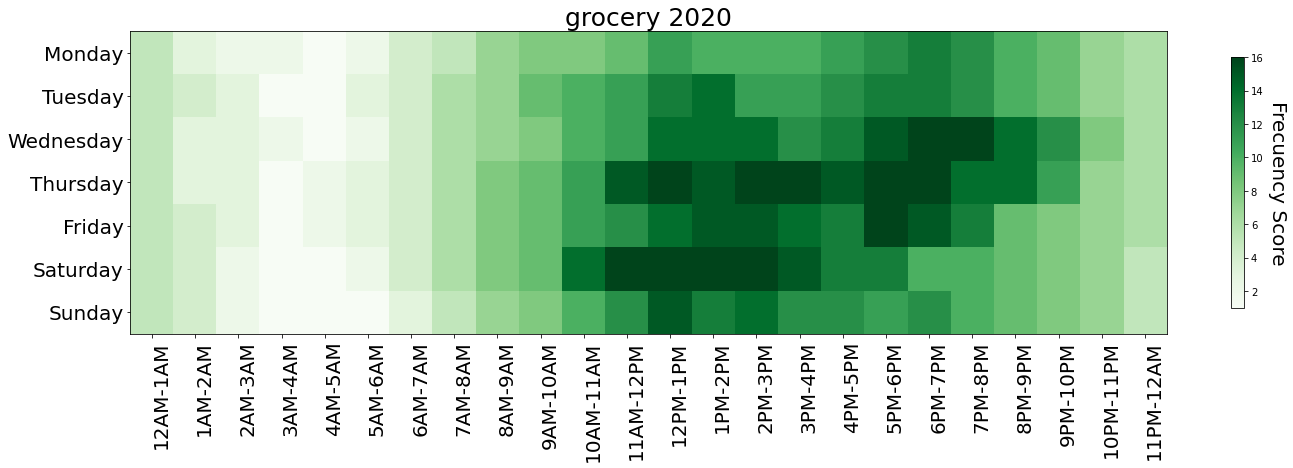

In [13]:
tweet_score = []

m_array = hc_efficiency_score(df5, "Monday", time_frames)
tweet_score.append(m_array)
t_array = hc_efficiency_score(df5, "Tuesday", time_frames)
tweet_score.append(t_array)
w_array = hc_efficiency_score(df5, "Wednesday", time_frames)
tweet_score.append(w_array)
th_array = hc_efficiency_score(df5, "Thursday", time_frames)
tweet_score.append(th_array)
f_array = hc_efficiency_score(df5, "Friday", time_frames)
tweet_score.append(f_array)
st_array = hc_efficiency_score(df5, "Saturday", time_frames)
tweet_score.append(st_array)
s_array = hc_efficiency_score(df5, "Sunday", time_frames)
tweet_score.append(s_array)
print(tweet_score)

fig, ax = plt.subplots(figsize=(20,50))
#(figsize=(width,height))
im = ax.imshow(tweet_score, cmap = cm.Greens)

#get rid of grid lines
ax.grid(False)

#show all ticks...
ax.set_xticks(np.arange(len(time_frames)))
ax.set_yticks(np.arange(len(days_of_week)))
# ... and label them with the respective list entries
ax.set_xticklabels(time_frames, fontsize=20)
ax.set_yticklabels(days_of_week, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

cbarlabel = "Frecuency Score"

cbar = ax.figure.colorbar(im, ax=ax,shrink=0.07)

cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize = 20)

ax.set_title("grocery 2020", fontsize = 25)
fig.tight_layout()
#plt.show()
from PIL import Image
#plt.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

In [9]:
#quantile 
data=[560, 314, 220, 217, 169, 234, 450, 694, 1093, 1313, 1483, 1736, 1920, 1828, 1877, 1896, 1914, 1986, 2024, 1985, 1835, 1586, 1282, 808,538, 386, 242, 165, 173, 247, 472, 827, 1255, 1511, 1740, 1944, 2023, 2133, 1921, 1940, 1982, 2054, 2053, 1987, 1844, 1664, 1259, 912,575, 289, 238, 188, 155, 222, 476, 862, 1181, 1487, 1773, 1946, 2082, 2060, 2056, 1997, 2044, 2186, 2347, 2245, 2121, 1950, 1441, 988,626, 341, 269, 169, 192, 275, 518, 882, 1309, 1665, 1930, 2147, 2606, 2162, 2214, 2504, 2183, 2273, 2507, 2137, 2077, 1941, 1275, 945,629, 397, 269, 160, 199, 276, 514, 872, 1319, 1610, 1926, 1995, 2132, 2147, 2150, 2085, 2043, 2240, 2196, 2009, 1684, 1480, 1178, 840,592, 367, 227, 184, 148, 208, 401, 801, 1283, 1732, 2071, 2307, 2344, 2301, 2325, 2186, 2010, 2030, 1829, 1775, 1593, 1352, 1135, 797,590, 352, 223, 175, 135, 154, 319, 606, 1022, 1487, 1775, 1975, 2194, 2034, 2077, 1975, 1981, 1917, 1977, 1903, 1593, 1444, 1091, 792]
 
quartile_1 = np.quantile(data, 0.0625)
quartile_2 = np.quantile(data, 0.125)
quartile_3 = np.quantile(data, 0.1875)
quartile_4 = np.quantile(data, 0.25)
quartile_5 = np.quantile(data, 0.3125)
quartile_6 = np.quantile(data, 0.375)
quartile_7 = np.quantile(data, 0.4325)
quartile_8 = np.quantile(data, 0.5)
quartile_9 = np.quantile(data, 0.5625)
quartile_10 = np.quantile(data, 0.625)
quartile_11 = np.quantile(data, 0.6875)
quartile_12 = np.quantile(data, 0.75)
quartile_13 = np.quantile(data, 0.8125)
quartile_14 = np.quantile(data, 0.875)
quartile_15 = np.quantile(data, 0.9325)
quartile_16 = np.quantile(data, 1)

 
print(quartile_1,
      quartile_2,
      quartile_3,
      quartile_4,
      quartile_5,
      quartile_6,
      quartile_7,
      quartile_8)

185.75 237.5 344.4375 533.0 797.75 1009.25 1282.2275 1499.0


In [14]:
fig.savefig("time_grid_grocerry_2020.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

### How many tweets in each timeframe

In [ ]:
tweet_count = []

def tweets(df, day, times):
    array1 = []
    for time in times:
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays","time_groups"]]
        instance_val = m1["time_groups"].count()
        array1.append(instance_val)
    return array1

m_count = tweets(df5, "Monday", time_frames)
print("Monday: ", m_count)
tweet_count.append(m_count)
t_count = tweets(df5, "Tuesday", time_frames)
tweet_count.append(t_count)
print("Tuesday: ", t_count)
w_count = tweets(df5, "Wednesday", time_frames)
tweet_count.append(w_count)
print("Wednesday: ", w_count)
th_count = tweets(df5, "Thursday", time_frames)
tweet_count.append(th_count)
print("Thursday: ", th_count)
f_count = tweets(df5, "Friday", time_frames)
tweet_count.append(f_count)
print("Friday: ", f_count)
st_count = tweets(df5, "Saturday", time_frames)
tweet_count.append(st_count)
print("Saturday: ", st_count)
s_count = tweets(df5, "Sunday", time_frames)
tweet_count.append(s_count)
print("Sunday: ", s_count)